<a href="https://colab.research.google.com/github/vinaypoduri888/Energy_optimization/blob/main/steel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy import stats

In [ ]:
df=pd.read_csv("/content/Steel_industry_data.csv")

In [ ]:
df

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      01/01/2018 00:15       3.17                                  2.95   
1      01/01/2018 00:30       4.00                                  4.46   
2      01/01/2018 00:45       3.24                                  3.28   
3      01/01/2018 01:00       3.31                                  3.56   
4      01/01/2018 01:15       3.82                                  4.50   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00       3.85                                  4.86   
35036  31/12/2018 23:15       3.74                                  3.74   
35037  31/12/2018 23:30       3.78                                  3.17   
35038  31/12/2018 23:45       3.78                                  3.06   
35039  31/12/2018 00:00       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                      0.00        0.0   
1                                      0.00        0.0   
2                                      0.00        0.0   
3                                      0.00        0.0   
4                                      0.00        0.0   
...                                     ...        ...   
35035                                  0.00        0.0   
35036                                  0.00        0.0   
35037                                  0.07        0.0   
35038                                  0.11        0.0   
35039                                  0.07        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
0                             73.21                        100.00    900   
1                             66.77                        100.00   1800   
2                             70.28                        100.00   2700   
3                             68.09                        100.00   3600   
4                             64.72                        100.00   4500   
...                             ...                           ...    ...   
35035                         62.10                        100.00  82800   
35036                         70.71                        100.00  83700   
35037                         76.62                         99.98  84600   
35038                         77.72                         99.96  85500   
35039                         77.22                         99.98      0   

      WeekStatus Day_of_week   Load_Type  
0        Weekday      Monday  Light_Load  
1        Weekday      Monday  Light_Load  
2        Weekday      Monday  Light_Load  
3        Weekday      Monday  Light_Load  
4        Weekday      Monday  Light_Load  
...          ...         ...         ...  
35035    Weekday      Monday  Light_Load  
35036    Weekday      Monday  Light_Load  
35037    Weekday      Monday  Light_Load  
35038    Weekday      Monday  Light_Load  
35039    Weekday      Monday  Light_Load  

[35040 rows x 11 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [ ]:


df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load

In [ ]:
df.isnull()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      False      False                                 False   
1      False      False                                 False   
2      False      False                                 False   
3      False      False                                 False   
4      False      False                                 False   
...      ...        ...                                   ...   
35035  False      False                                 False   
35036  False      False                                 False   
35037  False      False                                 False   
35038  False      False                                 False   
35039  False      False                                 False   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                     False      False   
1                                     False      False   
2                                     False      False   
3                                     False      False   
4                                     False      False   
...                                     ...        ...   
35035                                 False      False   
35036                                 False      False   
35037                                 False      False   
35038                                 False      False   
35039                                 False      False   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
0                             False                         False  False   
1                             False                         False  False   
2                             False                         False  False   
3                             False                         False  False   
4                             False                         False  False   
...                             ...                           ...    ...   
35035                         False                         False  False   
35036                         False                         False  False   
35037                         False                         False  False   
35038                         False                         False  False   
35039                         False                         False  False   

       WeekStatus  Day_of_week  Load_Type  
0           False        False      False  
1           False        False      False  
2           False        False      False  
3           False        False      False  
4           False        False      False  
...           ...          ...        ...  
35035       False        False      False  
35036       False        False      False  
35037       False        False      False  
35038       False        False      False  
35039       False        False      False  

[35040 rows x 11 columns]

In [ ]:
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [ ]:
df.describe()

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  35040.000000                          35040.000000   
mean      27.386892                             13.035384   
std       33.444380                             16.306000   
min        0.000000                              0.000000   
25%        3.200000                              2.300000   
50%        4.570000                              5.000000   
75%       51.237500                             22.640000   
max      157.180000                             96.910000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          35040.000000  35040.000000   
mean                               3.870949      0.011524   
std                                7.424463      0.016151   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                                0.000000      0.000000   
75%                                2.090000      0.020000   
max                               27.760000      0.070000   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
count                  35040.000000                  35040.000000   
mean                      80.578056                     84.367870   
std                       18.921322                     30.456535   
min                        0.000000                      0.000000   
25%                       63.320000                     99.700000   
50%                       87.960000                    100.000000   
75%                       99.022500                    100.000000   
max                      100.000000                    100.000000   

                NSM  
count  35040.000000  
mean   42750.000000  
std    24940.534317  
min        0.000000  
25%    21375.000000  
50%    42750.000000  
75%    64125.000000  
max    85500.000000

In [ ]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

<Axes: >

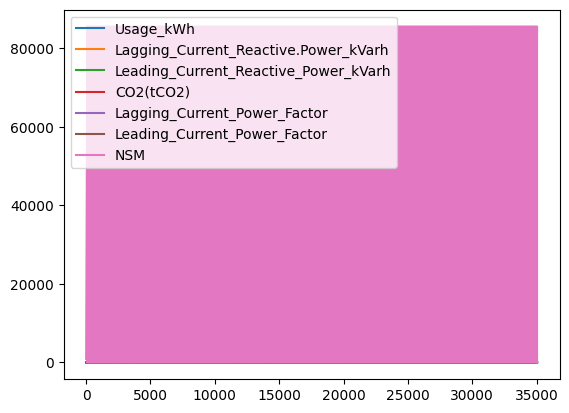

In [ ]:
df.plot()

In [ ]:
df.head()


date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load

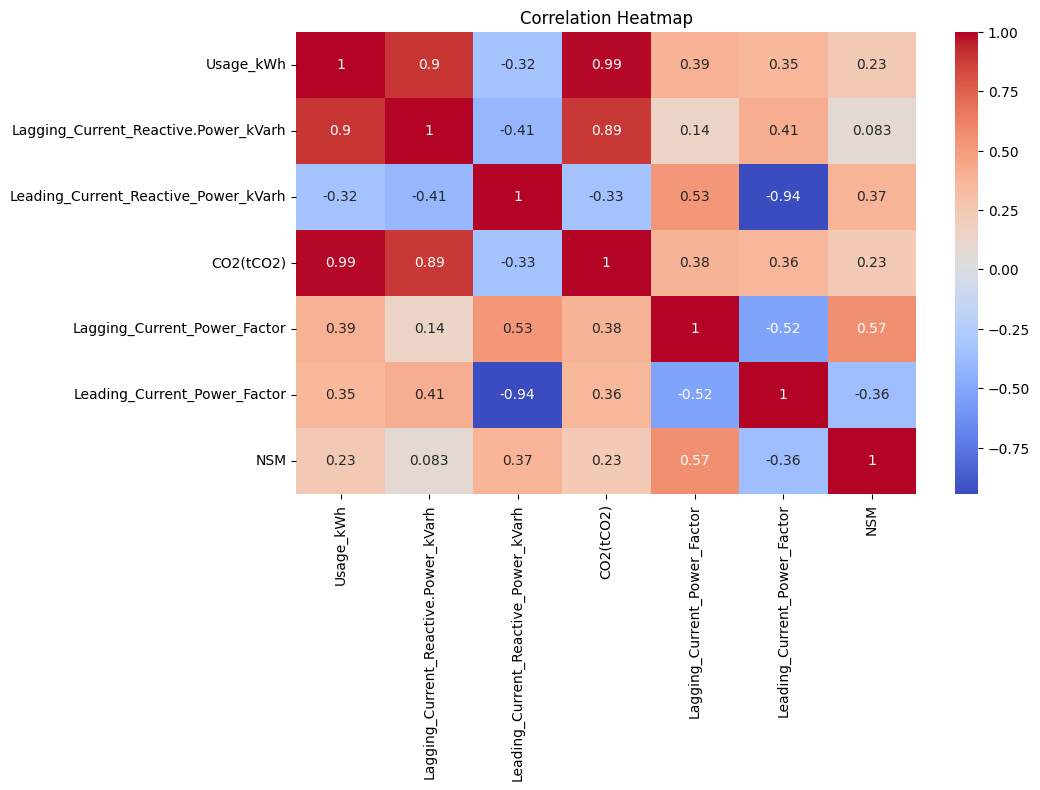

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


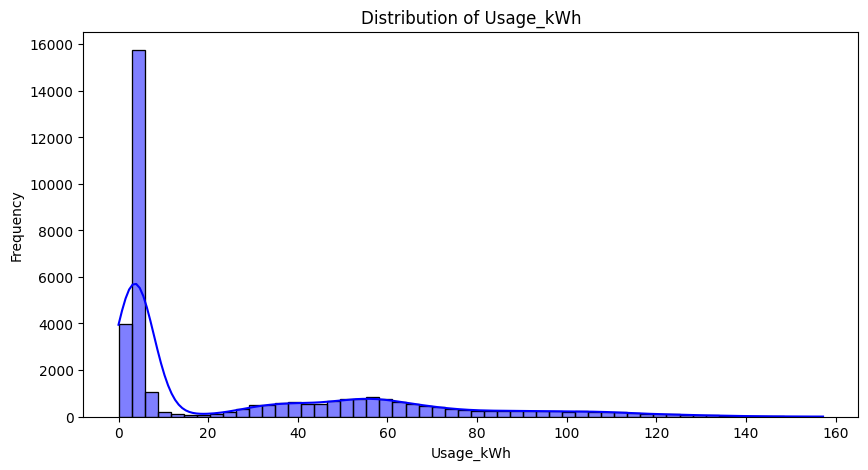

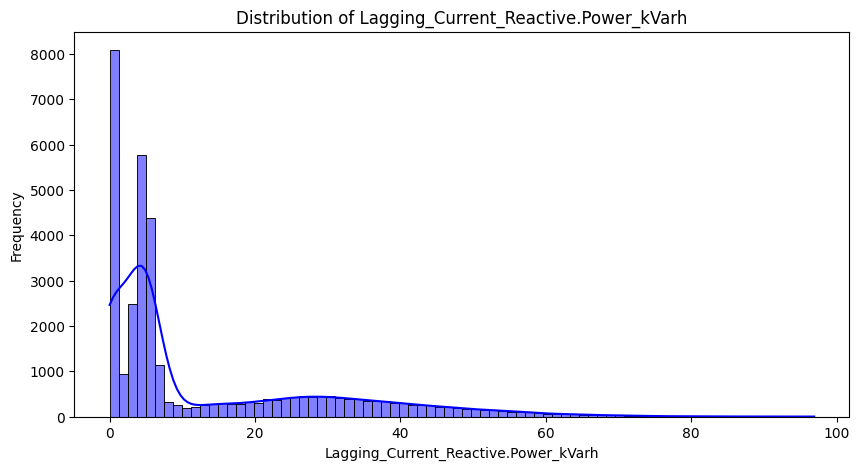

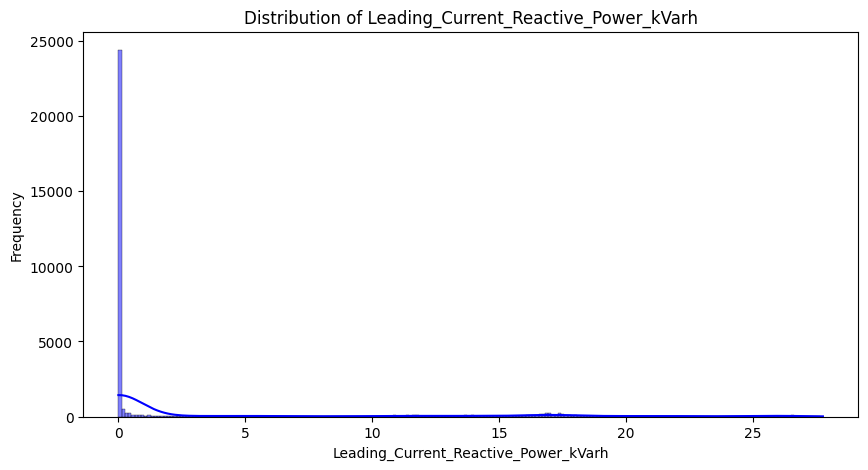

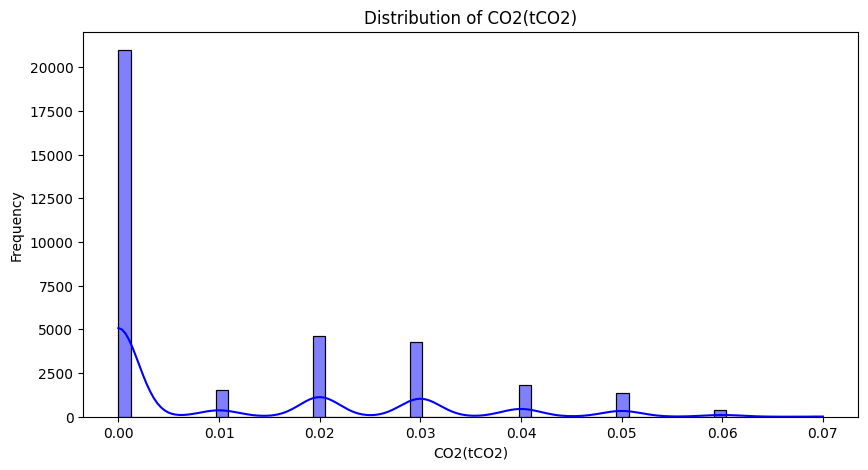

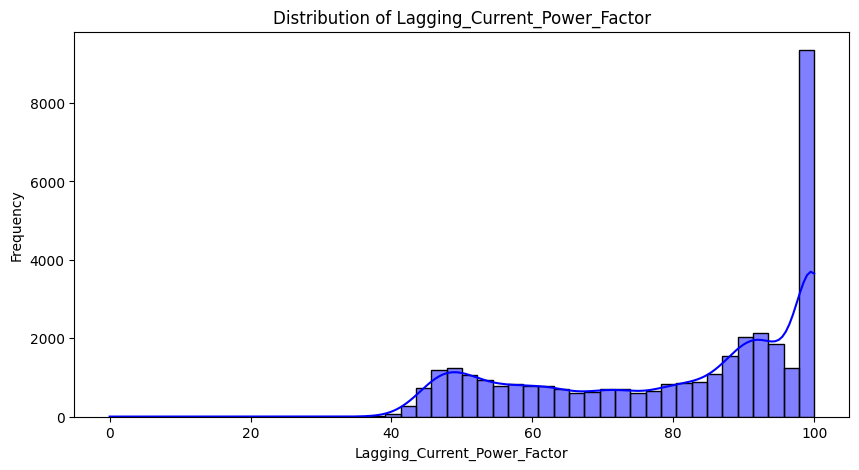

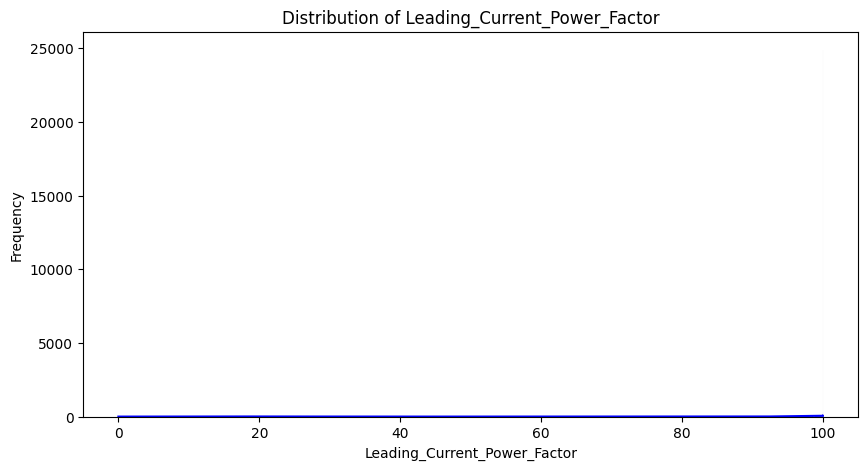

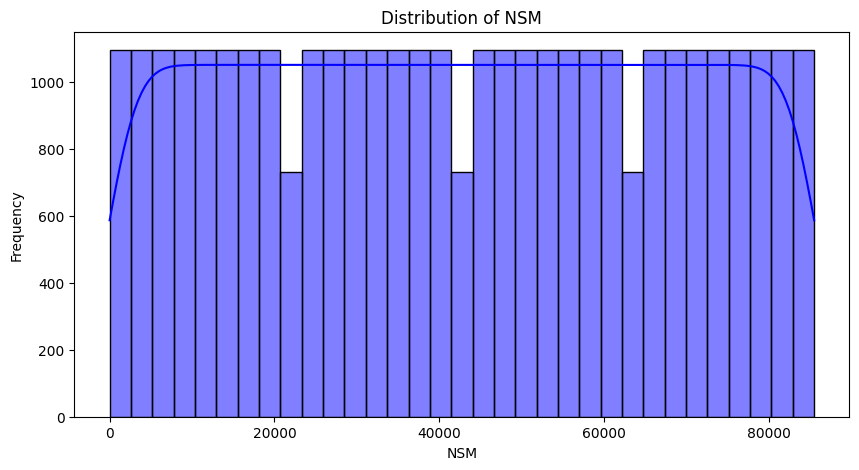

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

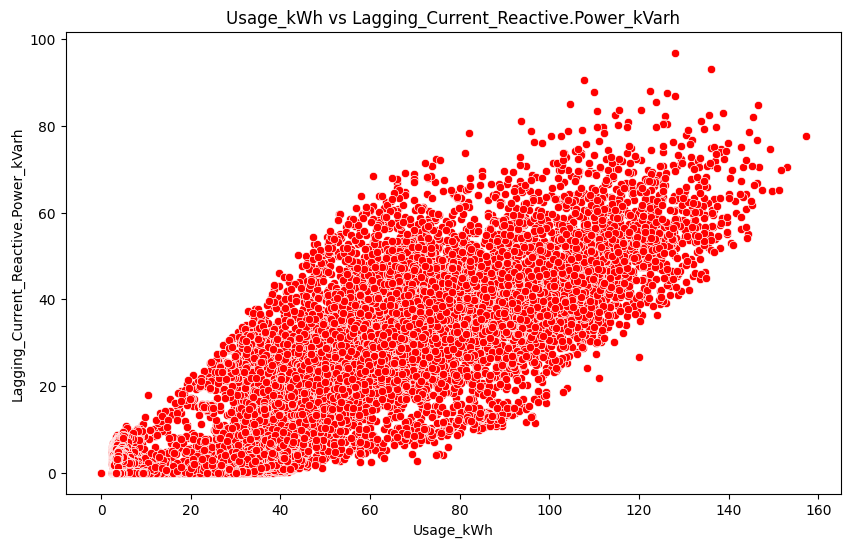

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Usage_kWh', y='Lagging_Current_Reactive.Power_kVarh', color='red')
plt.title('Usage_kWh vs Lagging_Current_Reactive.Power_kVarh')
plt.xlabel('Usage_kWh')
plt.ylabel('Lagging_Current_Reactive.Power_kVarh')
plt.show()

<ipython-input-15-3df65ce7d86c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


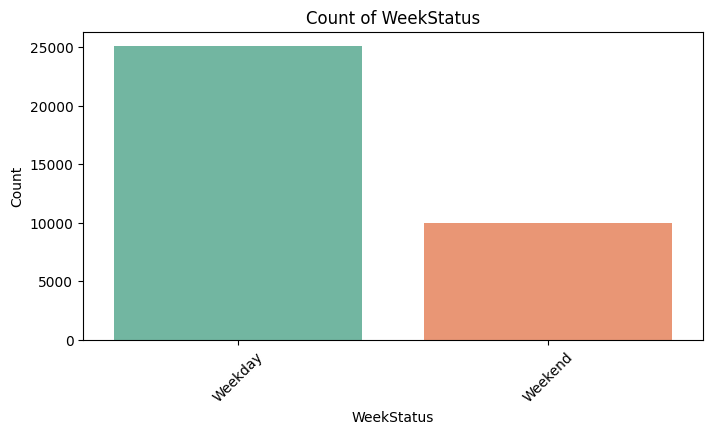

<ipython-input-15-3df65ce7d86c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


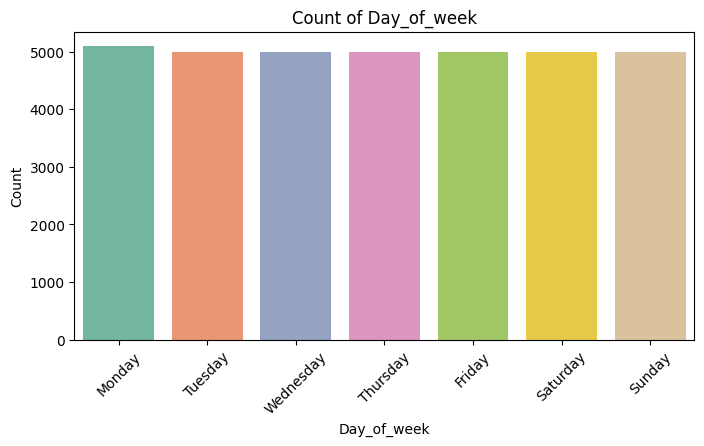

<ipython-input-15-3df65ce7d86c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


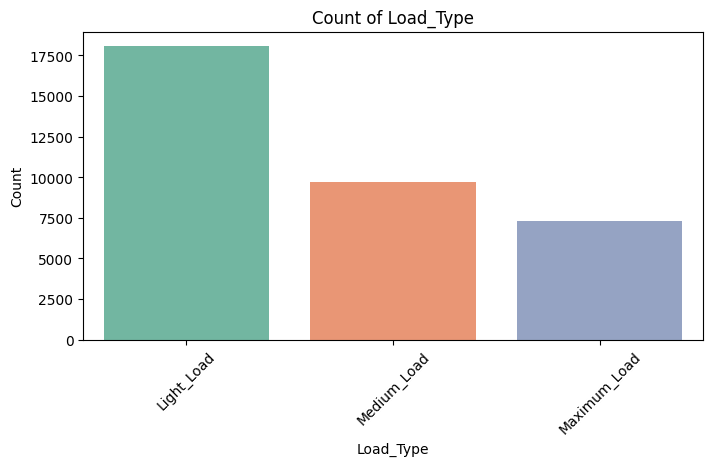

In [ ]:
categorical_columns = ['WeekStatus', 'Day_of_week', 'Load_Type']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
z_scores = df[numerical_columns].apply(zscore)

# Identify outliers
outliers_zscore = {}
threshold = 3
for col in numerical_columns:
    outliers_zscore[col] = df[(z_scores[col] > threshold) | (z_scores[col] < -threshold)]

# Print outliers for each column
for col, outlier_data in outliers_zscore.items():
    print(f"Outliers in {col}:\n", outlier_data)

Outliers in Usage_kWh:
                    date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
140    02/01/2018 11:15     128.52                                 70.85   
141    02/01/2018 11:30     144.47                                 78.48   
153    02/01/2018 14:30     129.10                                 53.50   
155    02/01/2018 15:00     143.89                                 60.91   
157    02/01/2018 15:30     141.44                                 62.57   
...                 ...        ...                                   ...   
33836  19/12/2018 11:15     140.80                                 69.77   
33848  19/12/2018 14:15     149.18                                 74.56   
33851  19/12/2018 15:00     145.22                                 70.67   
33853  19/12/2018 15:30     130.46                                 60.23   
33856  19/12/2018 16:15     133.56                                 64.40   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
140  

In [ ]:
# Summary statistics for numerical columns
numerical_cols = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
                  'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
                  'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']
print(df[numerical_cols].describe())


          Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  35040.000000                          35040.000000   
mean      27.386892                             13.035384   
std       33.444380                             16.306000   
min        0.000000                              0.000000   
25%        3.200000                              2.300000   
50%        4.570000                              5.000000   
75%       51.237500                             22.640000   
max      157.180000                             96.910000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          35040.000000  35040.000000   
mean                               3.870949      0.011524   
std                                7.424463      0.016151   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                                0.000000      0.000000   
75%                    

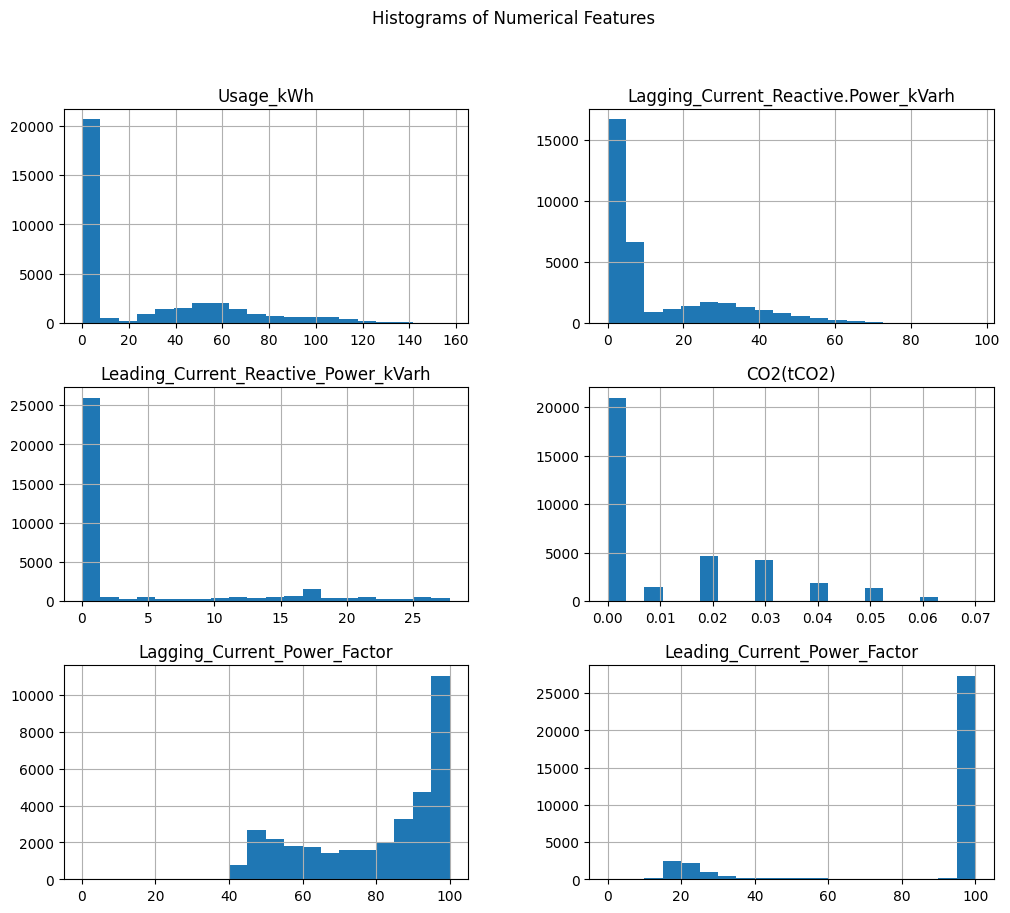

In [ ]:
df[numerical_cols].hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

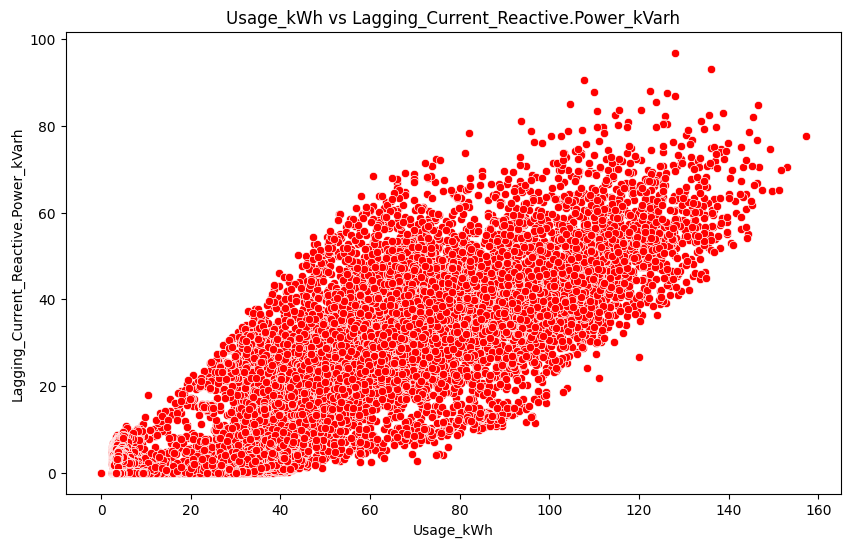

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Usage_kWh', y='Lagging_Current_Reactive.Power_kVarh', color='red')
plt.title('Usage_kWh vs Lagging_Current_Reactive.Power_kVarh')
plt.xlabel('Usage_kWh')
plt.ylabel('Lagging_Current_Reactive.Power_kVarh')
plt.show()

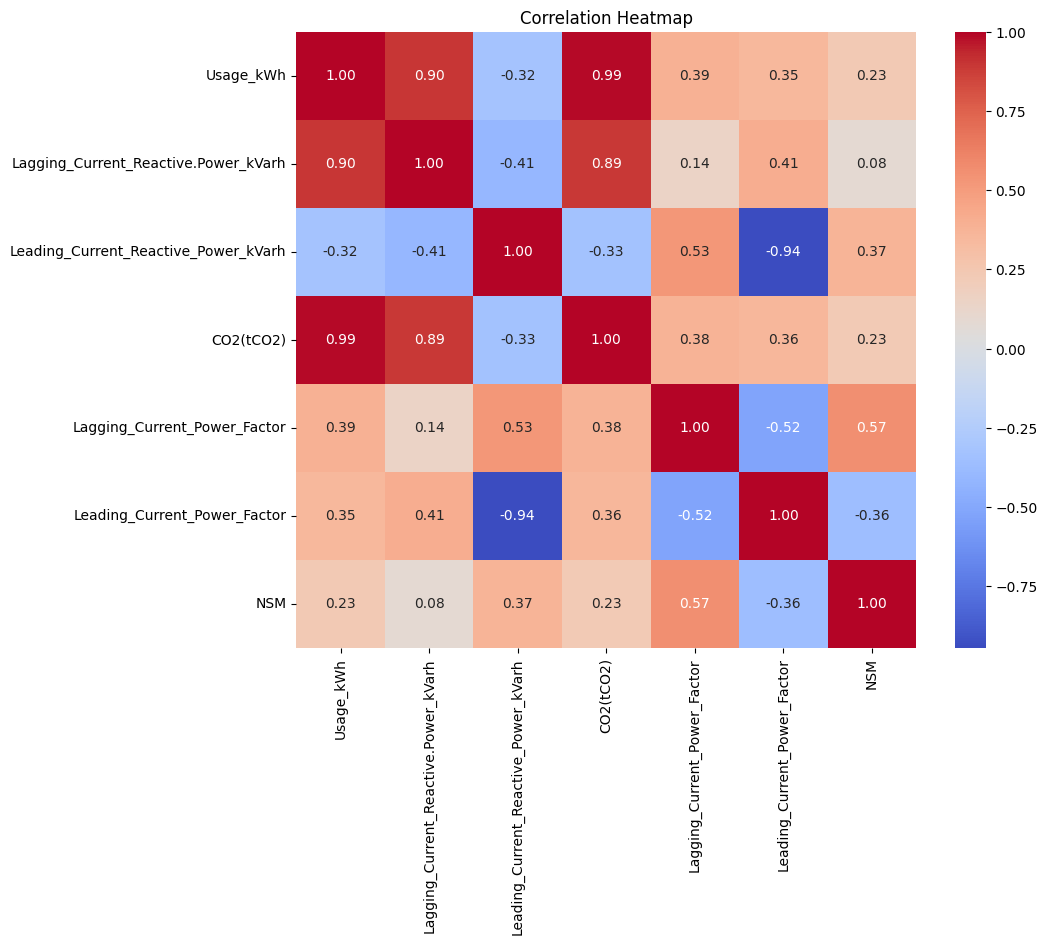

In [ ]:
# Correlation Heatmap for Numerical Features
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-24-2f1235603500>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='WeekStatus', y='Usage_kWh', palette='Set3')


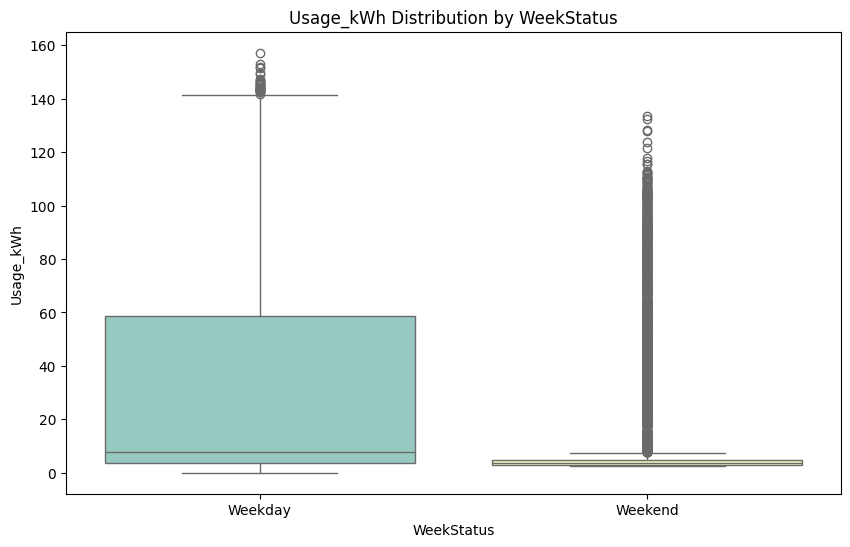

In [ ]:
# Bivariate Analysis: Numerical vs Categorical
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='WeekStatus', y='Usage_kWh', palette='Set3')
plt.title('Usage_kWh Distribution by WeekStatus')
plt.xlabel('WeekStatus')
plt.ylabel('Usage_kWh')
plt.show()

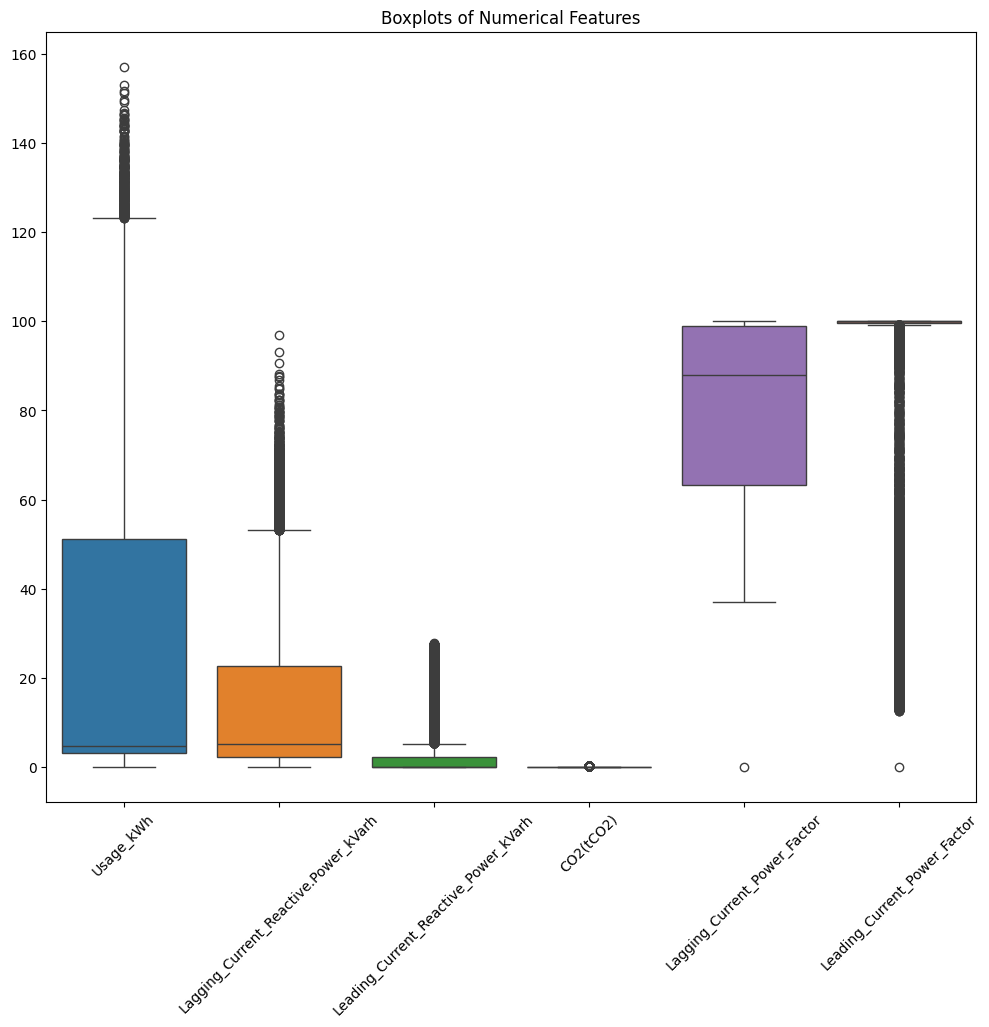

In [ ]:
# Boxplot for outliers detection
plt.figure(figsize=(12, 10))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(df_encoded.head())

   Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0       3.17                                  2.95   
1       4.00                                  4.46   
2       3.24                                  3.28   
3       3.31                                  3.56   
4       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  360

In [ ]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


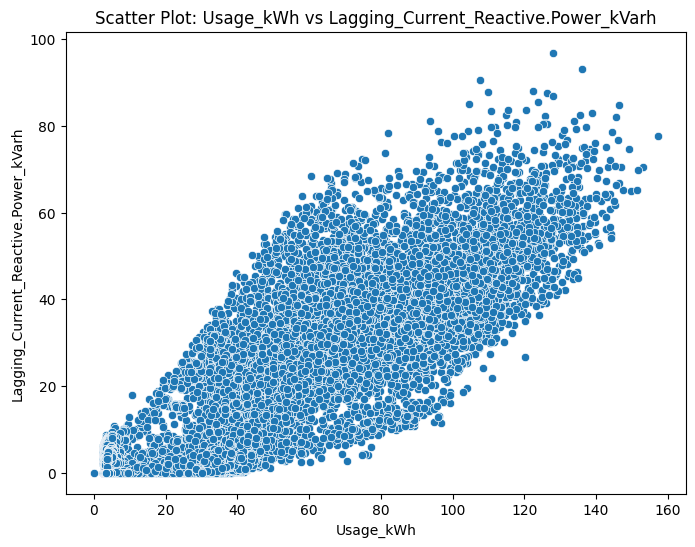

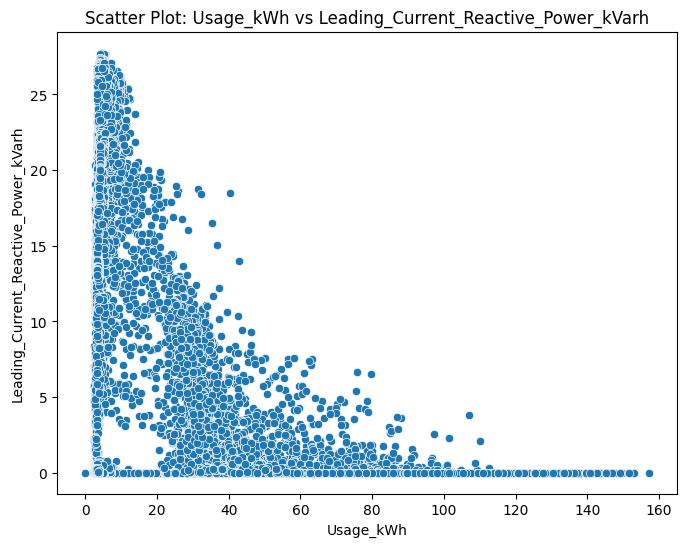

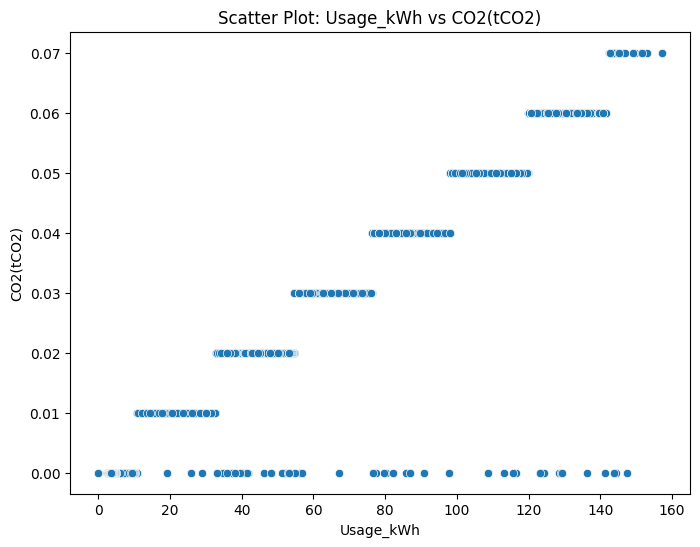

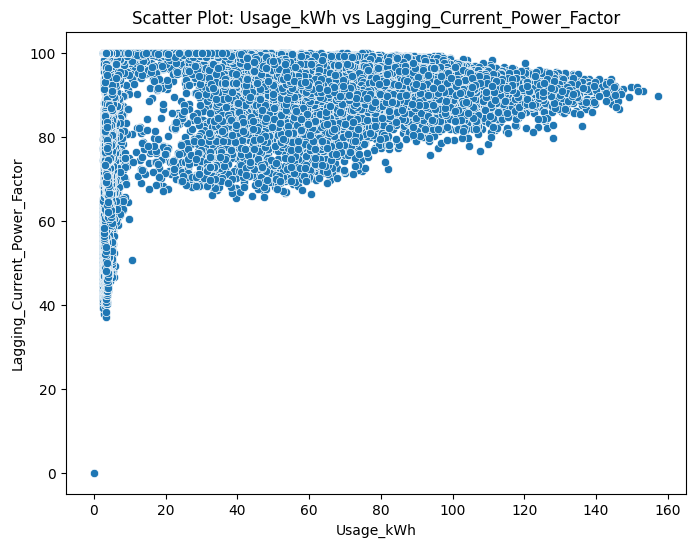

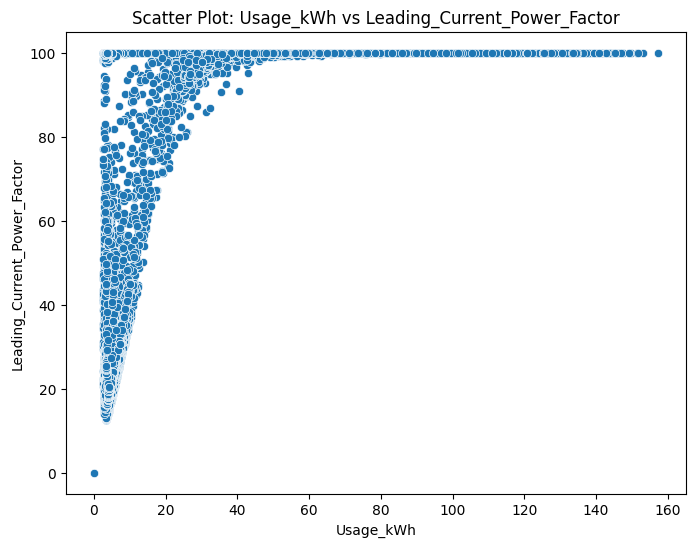

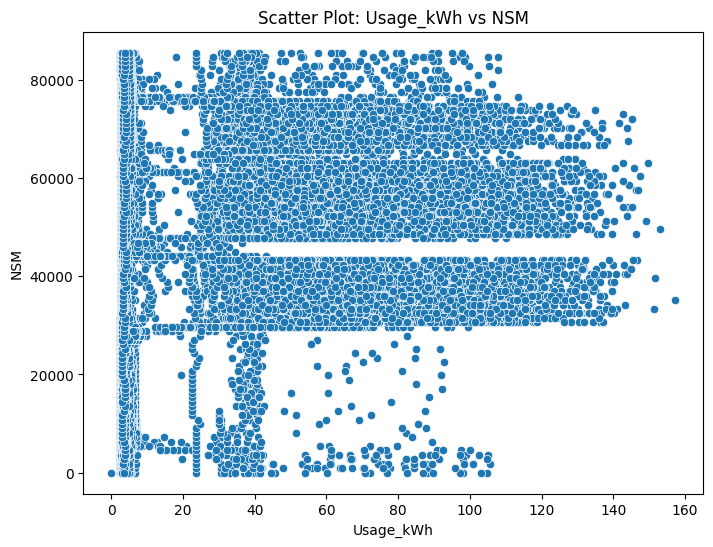

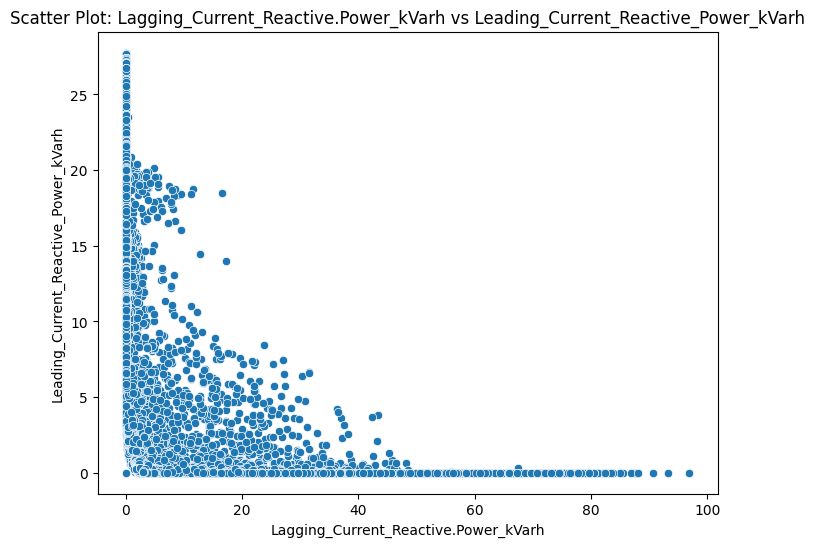

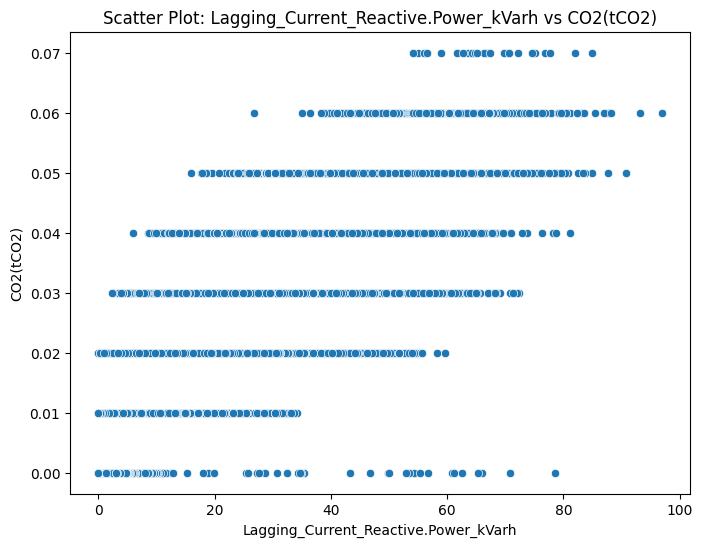

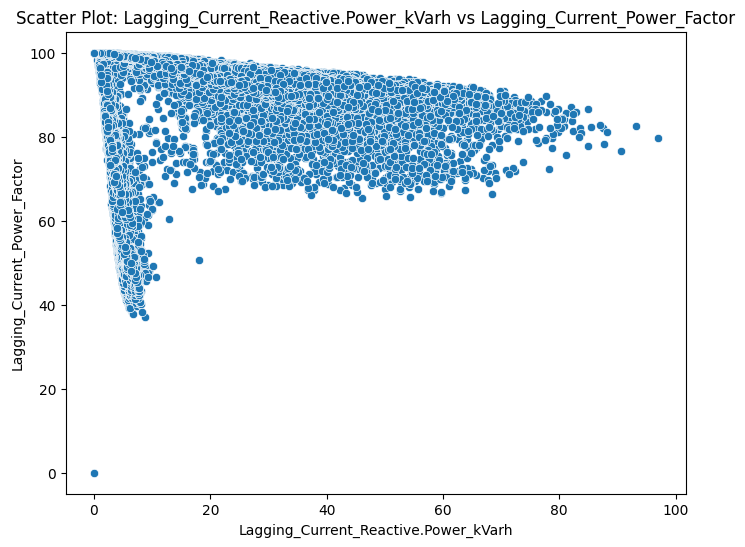

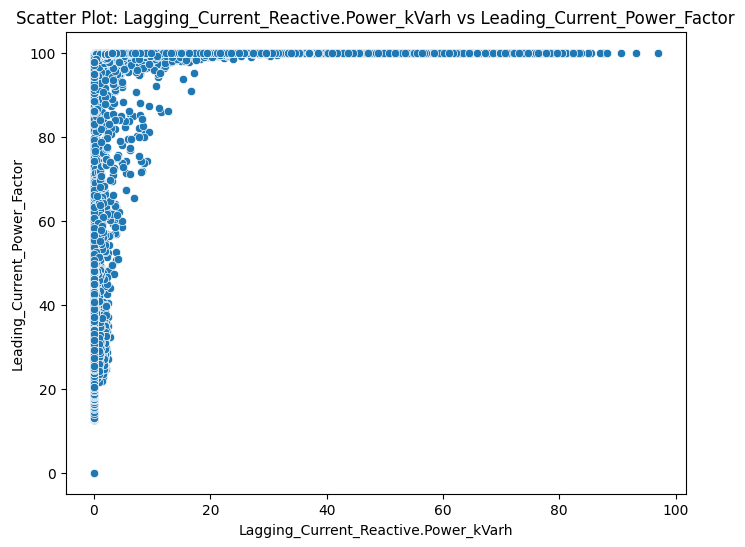

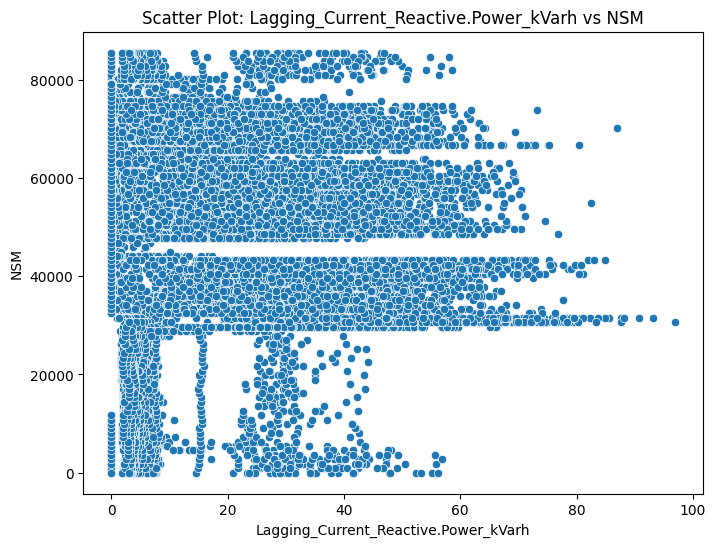

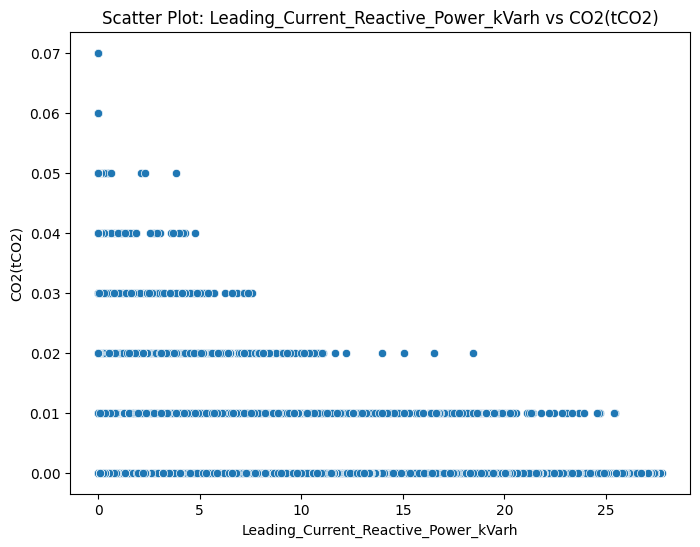

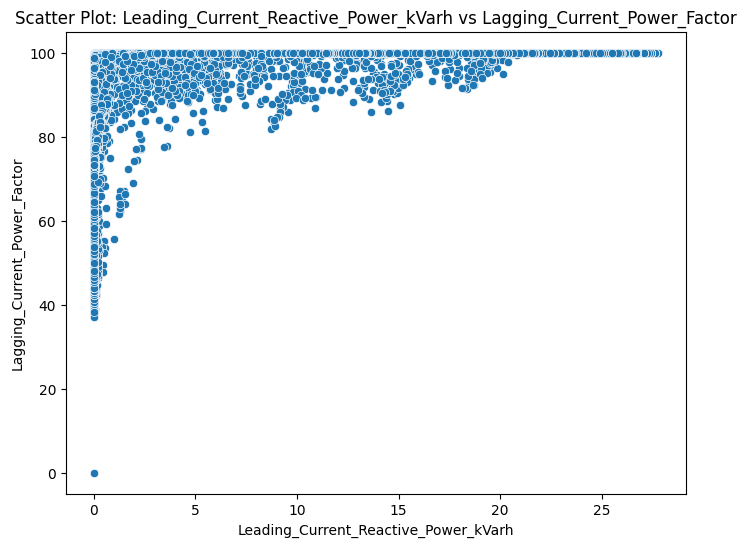

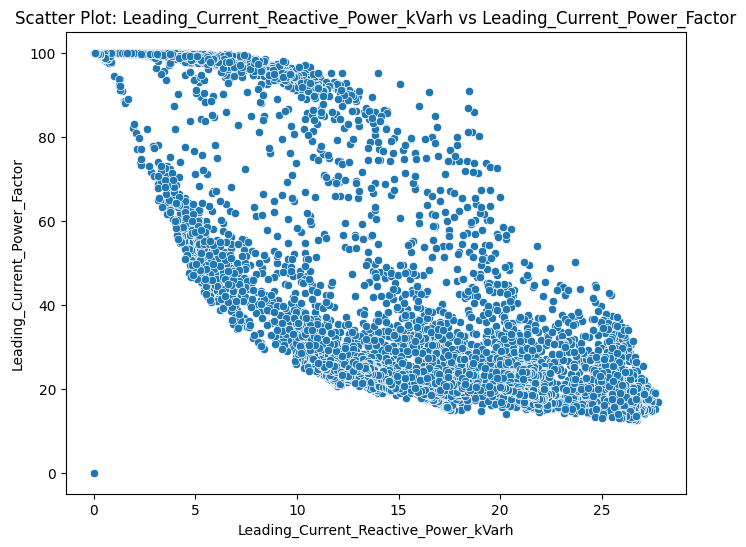

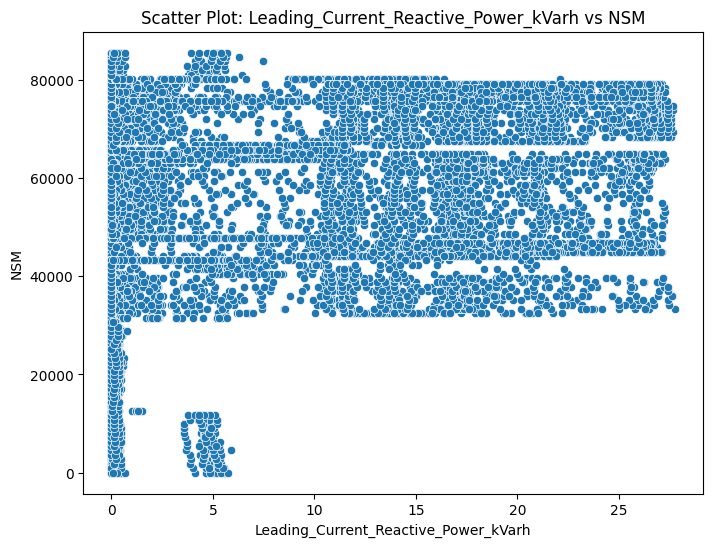

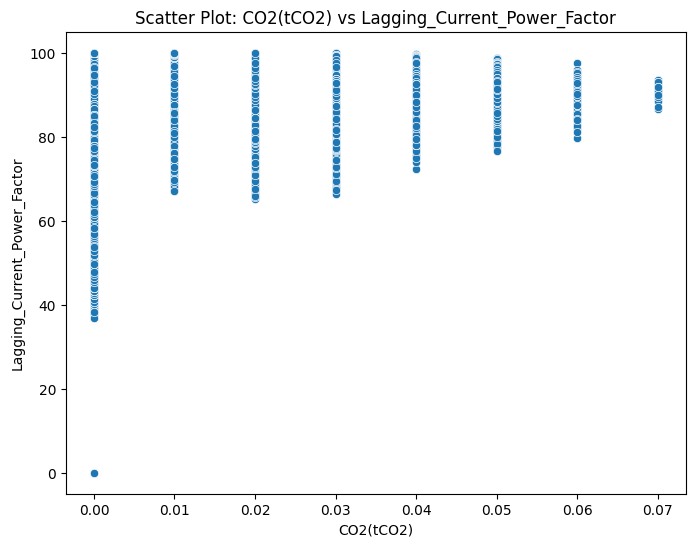

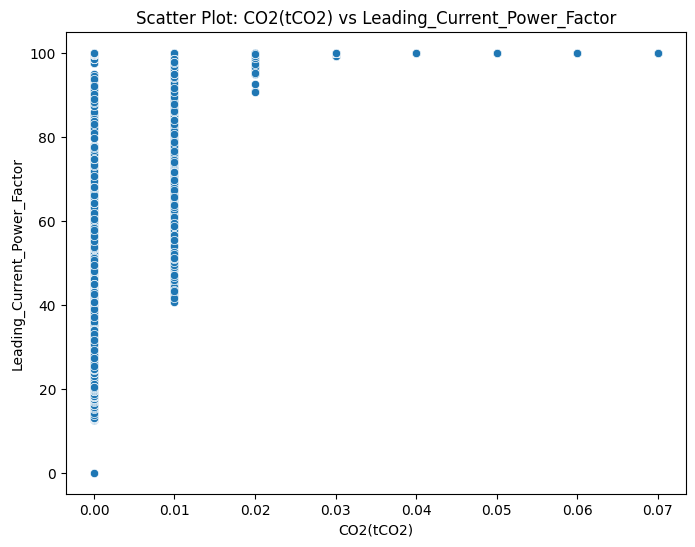

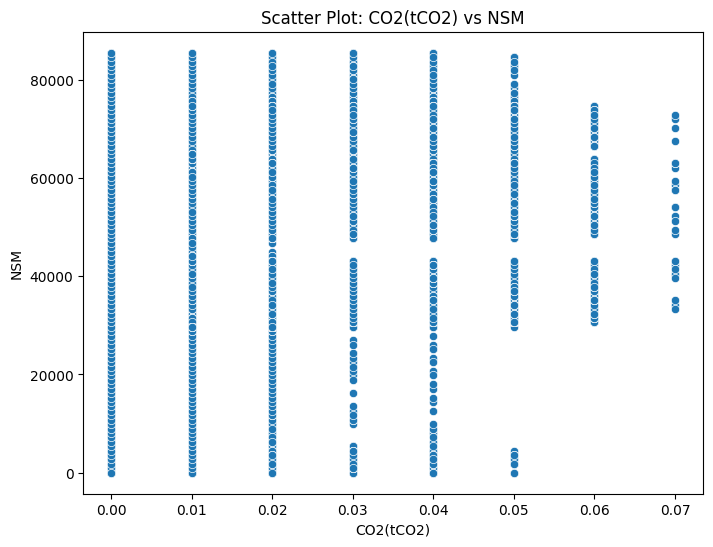

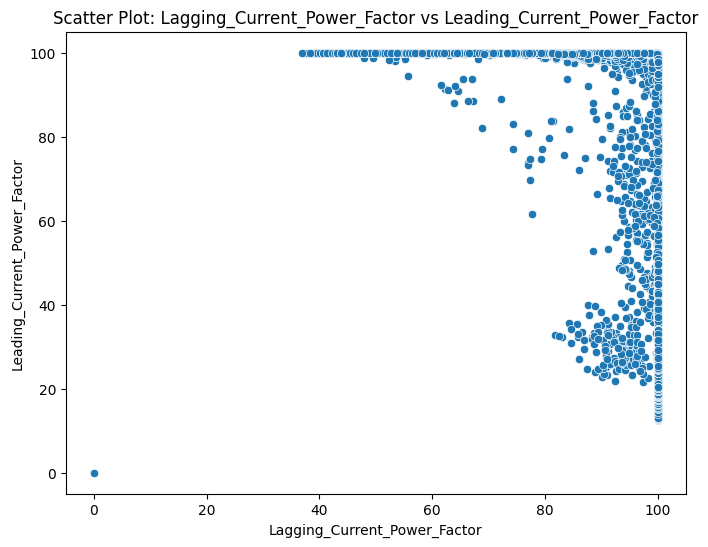

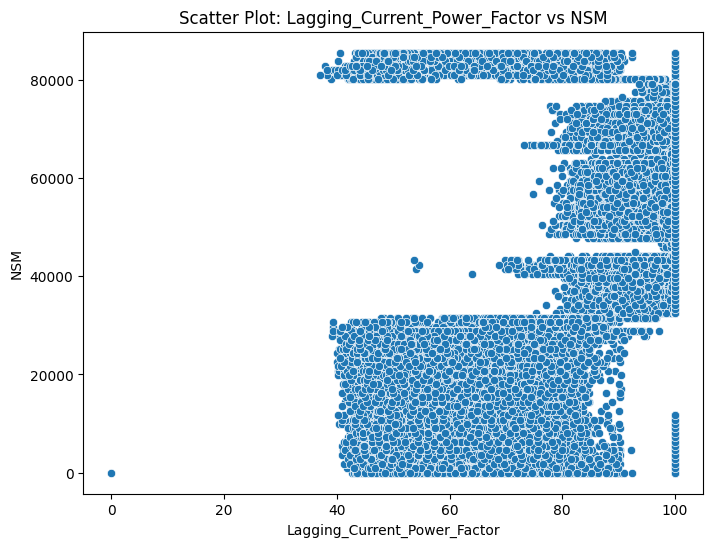

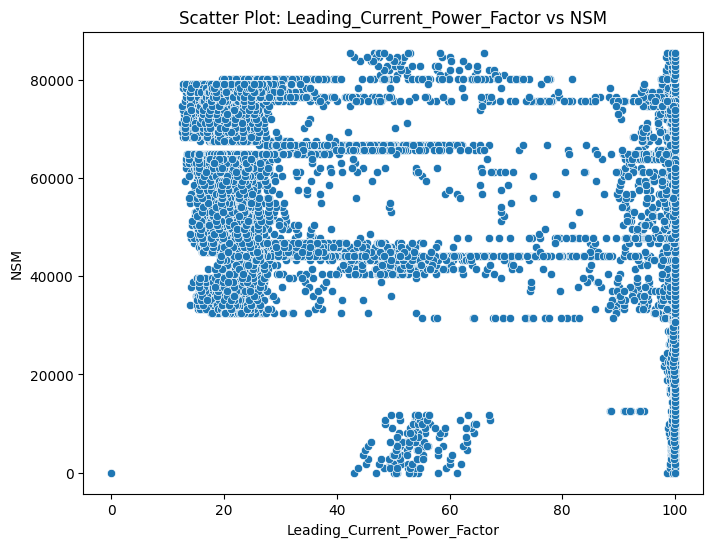

In [ ]:
# Bivariate Analysis: Numerical vs. Numerical
for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        x = numerical_cols[i]
        y = numerical_cols[j]
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=x, y=y)
        plt.title(f'Scatter Plot: {x} vs {y}')
        plt.show()

In [ ]:
# Calculate and display correlation coefficient
corr_coef = df[[x, y]].corr().iloc[0, 1]
print(f'Correlation between {x} and {y}: {corr_coef:.2f}\n')


Correlation between Leading_Current_Power_Factor and NSM: -0.36



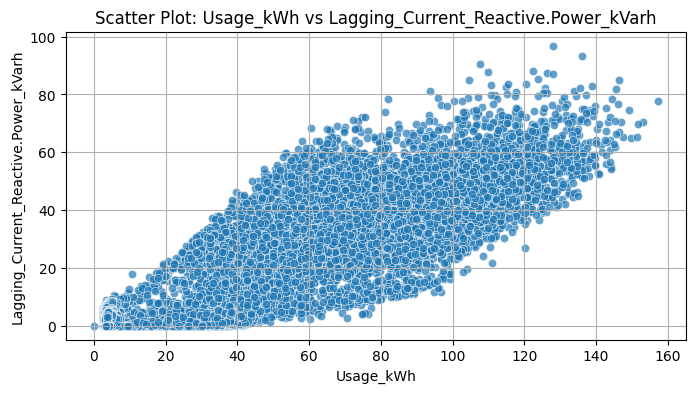

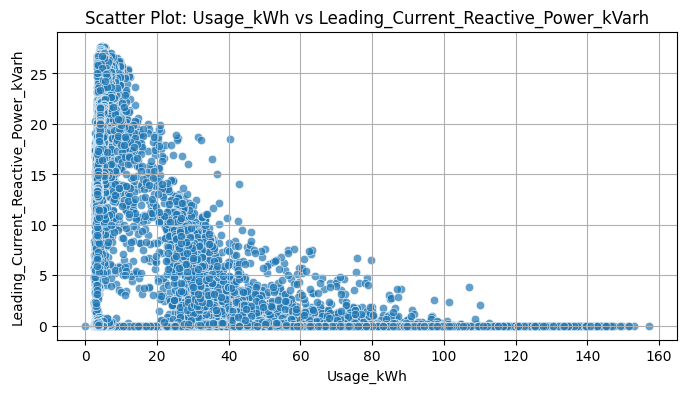

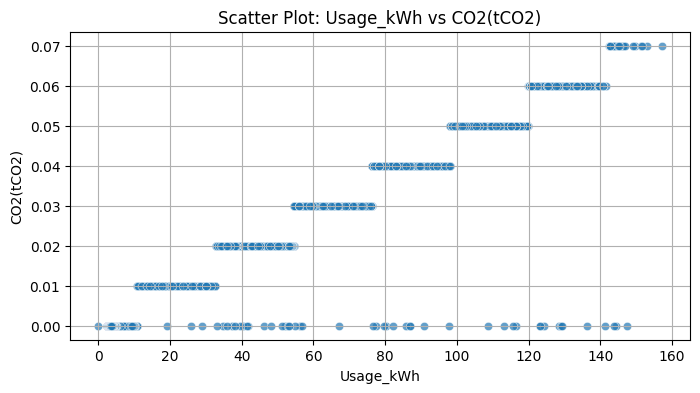

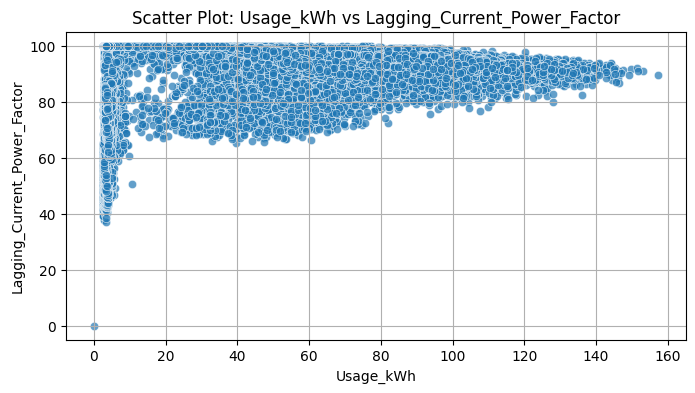

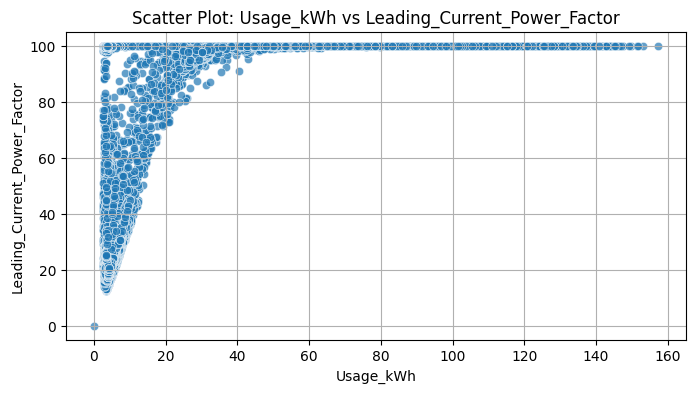

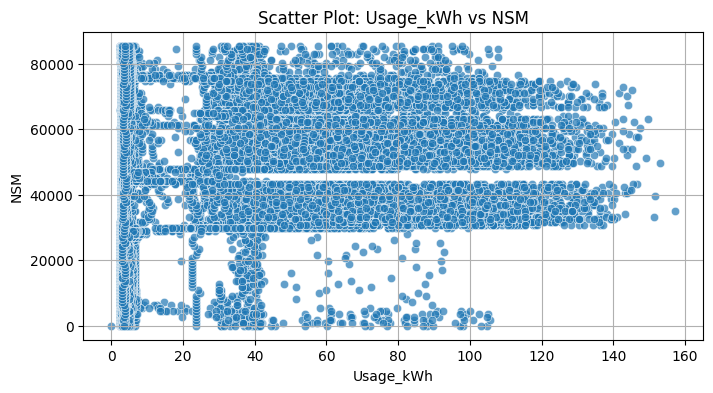

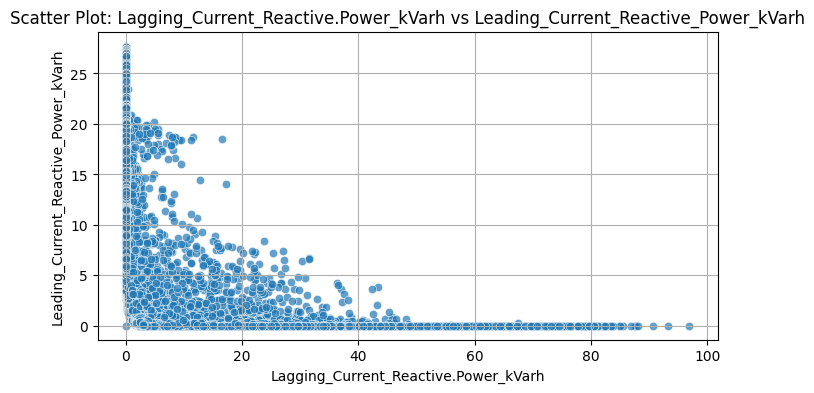

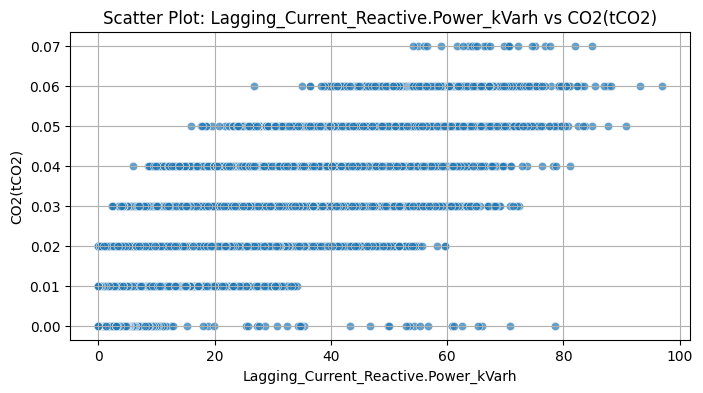

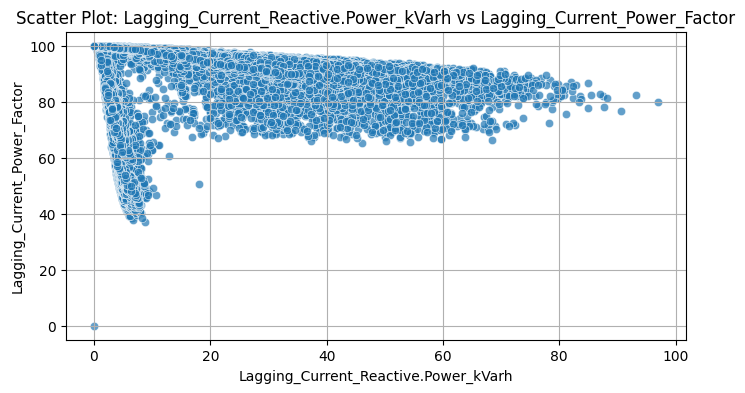

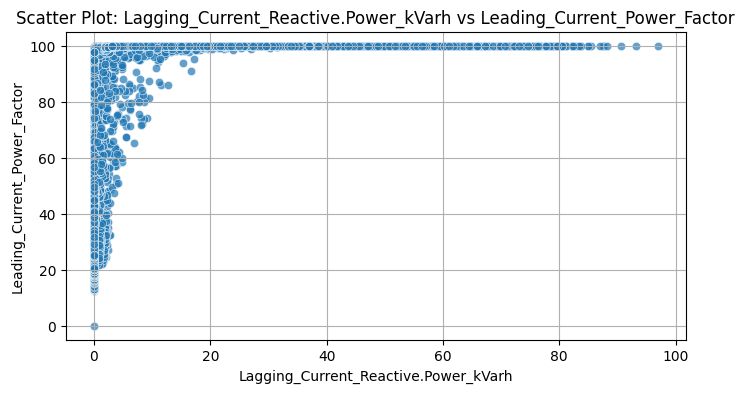

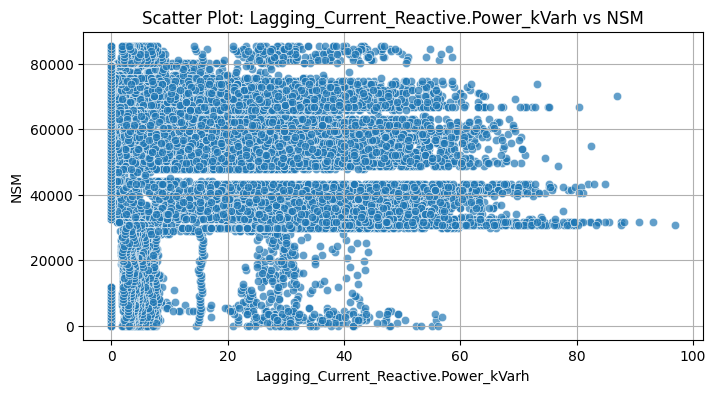

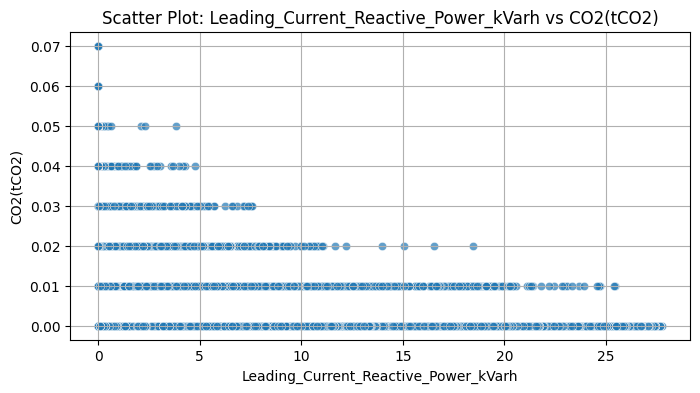

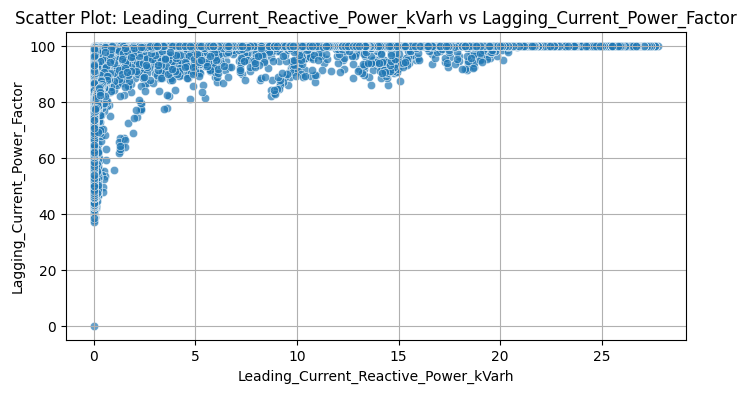

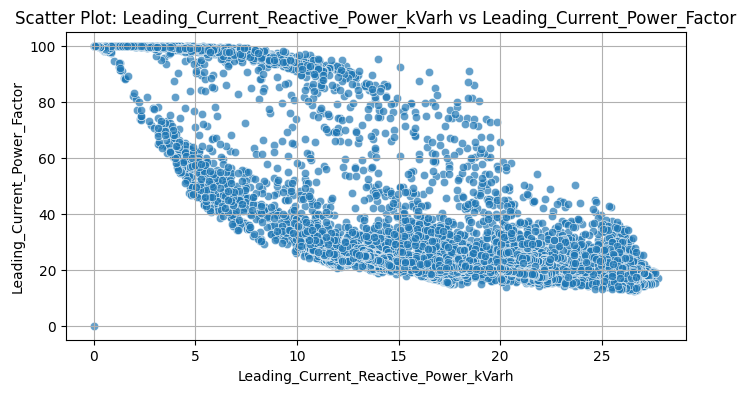

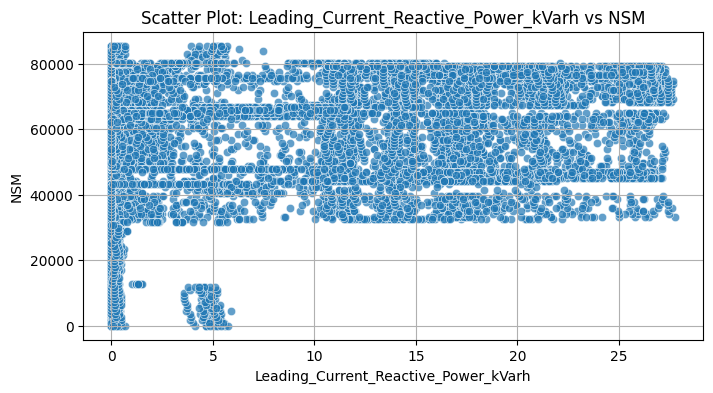

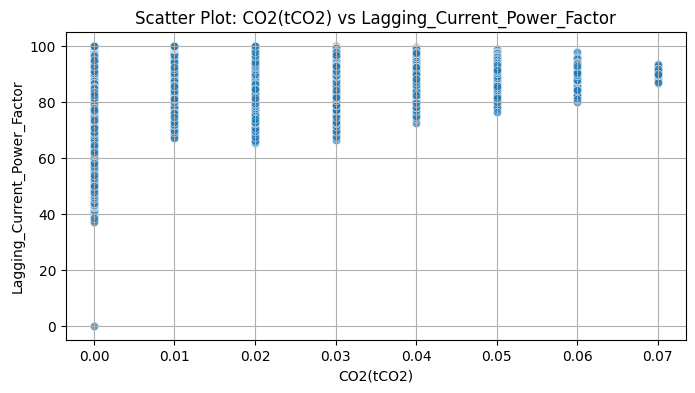

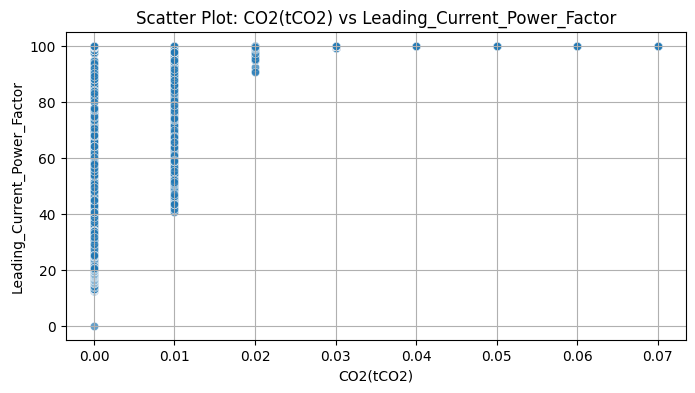

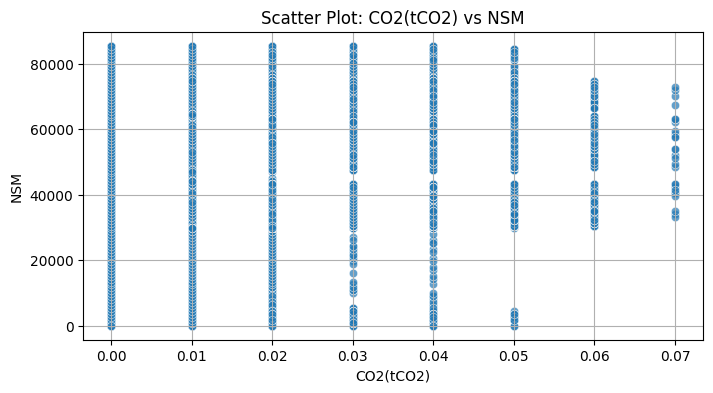

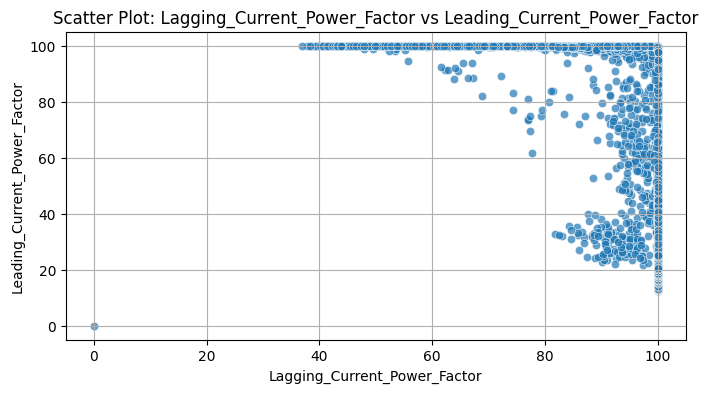

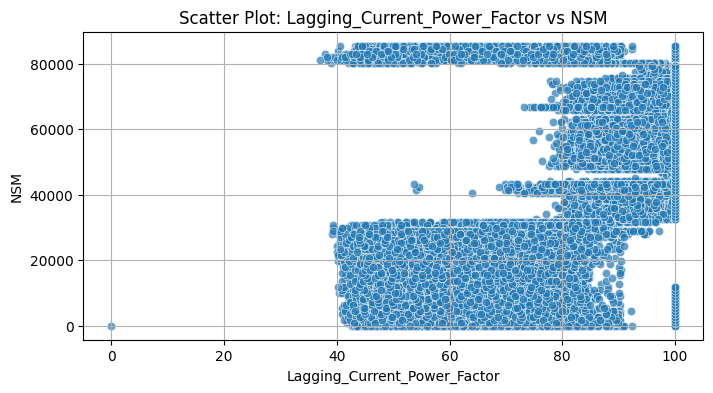

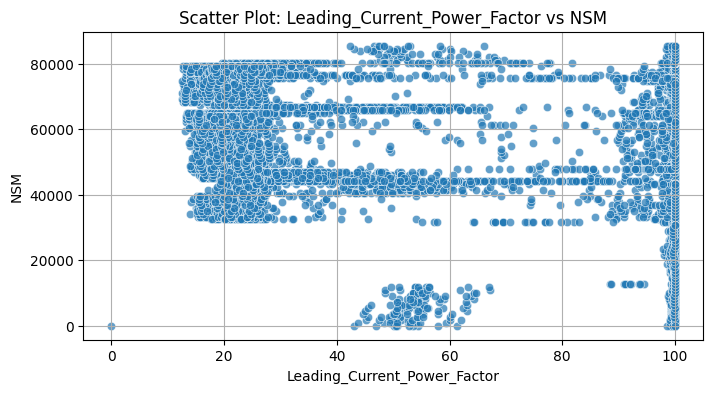

In [ ]:
# Scatter plots for each pair of numeric columns
for i, col1 in enumerate(numerical_cols):
    for col2 in numerical_cols[i + 1:]:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=data[col1], y=data[col2], alpha=0.7)
        plt.title(f'Scatter Plot: {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.grid(True)
        plt.show()

In [ ]:
# Apply One-Hot Encoding to 'WeekStatus' and 'Load_Type'
df_encoded = pd.get_dummies(df, columns=['WeekStatus', 'Load_Type'])

# Display the encoded DataFrame
print(df_encoded)


                   date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      01/01/2018 00:15       3.17                                  2.95   
1      01/01/2018 00:30       4.00                                  4.46   
2      01/01/2018 00:45       3.24                                  3.28   
3      01/01/2018 01:00       3.31                                  3.56   
4      01/01/2018 01:15       3.82                                  4.50   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00       3.85                                  4.86   
35036  31/12/2018 23:15       3.74                                  3.74   
35037  31/12/2018 23:30       3.78                                  3.17   
35038  31/12/2018 23:45       3.78                                  3.06   
35039  31/12/2018 00:00       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                            

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

# Load the dataset
data = pd.read_csv('/content/Steel_industry_data.csv')

# Preprocess the data
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')

# One-Hot Encode categorical variables
data = pd.get_dummies(data, columns=['WeekStatus', 'Day_of_week', 'Load_Type'], drop_first=True)

# Define feature columns and target variable
features = data.drop(columns=['Usage_kWh', 'CO2(tCO2)', 'date'])
target_usage = data['Usage_kWh']
target_co2 = data['CO2(tCO2)']

# Split the data into training and testing sets
X_train, X_test, y_train_usage, y_test_usage = train_test_split(features, target_usage, test_size=0.3, random_state=42)
_, _, y_train_co2, y_test_co2 = train_test_split(features, target_co2, test_size=0.3, random_state=42)

# Function to calculate Adjusted R^2
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Initialize and train Linear Regression model for Usage_kWh
lr_model_usage = LinearRegression()
lr_model_usage.fit(X_train, y_train_usage)

# Predict and evaluate Linear Regression model for Usage_kWh
lr_predictions_usage = lr_model_usage.predict(X_test)
lr_mae_usage = mean_absolute_error(y_test_usage, lr_predictions_usage)
lr_rmse_usage = np.sqrt(mean_squared_error(y_test_usage, lr_predictions_usage))
lr_r2_usage = r2_score(y_test_usage, lr_predictions_usage)
lr_adj_r2_usage = adjusted_r2(lr_r2_usage, X_test.shape[0], X_test.shape[1])

# Initialize and train XGBoost Regressor for Usage_kWh
xgb_model_usage = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model_usage.fit(X_train, y_train_usage)

# Predict and evaluate XGBoost Regressor for Usage_kWh
xgb_predictions_usage = xgb_model_usage.predict(X_test)
xgb_mae_usage = mean_absolute_error(y_test_usage, xgb_predictions_usage)
xgb_rmse_usage = np.sqrt(mean_squared_error(y_test_usage, xgb_predictions_usage))
xgb_r2_usage = r2_score(y_test_usage, xgb_predictions_usage)
xgb_adj_r2_usage = adjusted_r2(xgb_r2_usage, X_test.shape[0], X_test.shape[1])

# Repeat the process for CO2(tCO2) prediction
# Initialize and train Linear Regression model for CO2(tCO2)
lr_model_co2 = LinearRegression()
lr_model_co2.fit(X_train, y_train_co2)

# Predict and evaluate Linear Regression model for CO2(tCO2)
lr_predictions_co2 = lr_model_co2.predict(X_test)
lr_mae_co2 = mean_absolute_error(y_test_co2, lr_predictions_co2)
lr_rmse_co2 = np.sqrt(mean_squared_error(y_test_co2, lr_predictions_co2))
lr_r2_co2 = r2_score(y_test_co2, lr_predictions_co2)
lr_adj_r2_co2 = adjusted_r2(lr_r2_co2, X_test.shape[0], X_test.shape[1])

# Initialize and train XGBoost Regressor for CO2(tCO2)
xgb_model_co2 = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model_co2.fit(X_train, y_train_co2)

# Predict and evaluate XGBoost Regressor for CO2(tCO2)
xgb_predictions_co2 = xgb_model_co2.predict(X_test)
xgb_mae_co2 = mean_absolute_error(y_test_co2, xgb_predictions_co2)
xgb_rmse_co2 = np.sqrt(mean_squared_error(y_test_co2, xgb_predictions_co2))
xgb_r2_co2 = r2_score(y_test_co2, xgb_predictions_co2)
xgb_adj_r2_co2 = adjusted_r2(xgb_r2_co2, X_test.shape[0], X_test.shape[1])

# Print evaluation metrics
print("Linear Regression - Usage_kWh: MAE =", lr_mae_usage, ", RMSE =", lr_rmse_usage, ", R² =", lr_r2_usage, ", Adjusted R² =", lr_adj_r2_usage)
print("XGBoost Regressor - Usage_kWh: MAE =", xgb_mae_usage, ", RMSE =", xgb_rmse_usage, ", R² =", xgb_r2_usage, ", Adjusted R² =", xgb_adj_r2_usage)


Linear Regression - Usage_kWh: MAE = 6.9828910339506125 , RMSE = 9.740192422314584 , R² = 0.9154733035288009 , Adjusted R² = 0.9153605690569901
XGBoost Regressor - Usage_kWh: MAE = 0.4960692069664757 , RMSE = 1.0738887469384466 , R² = 0.9989725104688956 , Adjusted R² = 0.9989711400913176
